In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
diabetes = pd.read_csv(r'C:\Users\ricar\Proyectos\Ruta Machine Learning\Fundamentos practicos Machine Learning\Datasets\diabetes.csv')
diabetes.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
diabetes.shape

(768, 9)

In [27]:
#Separando las columnas independientes y dependiente
X = diabetes.iloc[:,:8]
Y = diabetes.iloc[:,8]

In [30]:
#Colocando las variables de entrenamiento y test
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 0)

In [34]:
logreg = LogisticRegression(max_iter = len(X_train)) #como parametro colocaremos el tamaño de los datos de entrenamiento
logreg.fit(X_train , y_train) #Entrenando nuesta regresion logisctica con los datos de entrenamiento
y_pred = logreg.predict(X_test) #Prediciendo de acuerdo a los datos de test , si se realizo correctamente , para comparar el y_pred con el y_test

In [35]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
#La matriz de confusion sirve para validar el modelo
matriz_confusion = metrics.confusion_matrix(y_test , y_pred)
matriz_confusion

array([[117,  13],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta prediccion , informacion : y_pred')

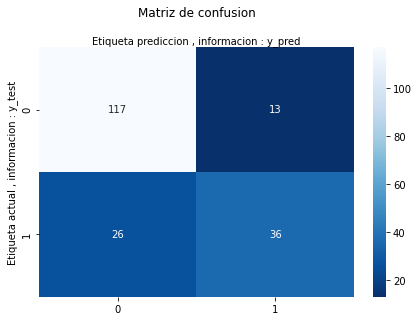

In [40]:
#colocando la matriz de confusion de manera grafica para entenderla mejor 
import numpy as np

class_names = [0,1] #clasificamos por 0 = no tiene diabetes , 1 = tiene diabetes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks , class_names)
plt.yticks(tick_marks , class_names)

sns.heatmap(pd.DataFrame(matriz_confusion) , annot = True , cmap = 'Blues_r',fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion' , y = 1.1)
plt.ylabel('Etiqueta actual , informacion : y_test')
plt.xlabel('Etiqueta prediccion , informacion : y_pred')

In [41]:
#Entendiendo la predicion:

#Resultado del cuadro [0,0]: Buen positivo
#Valor : 117 , cantidad de ejemplos clasificados correctamente cuando es un positivo (prediccion correcta por el modelo)

#Resultado del cuadro [1,1]: Buen negativo
#Valor : 36 , cantidad de ejemplos clasificados correctamente cuando es un negativo (prediccion correcta por el modelo)

#Resultado del cuadro [0,1]: Falso negativo
#Valor : 13 , cantidad de ejemplos clasificados incorrectamente cuando es un negativo (prediccion correcta por el modelo)
# Es decir , no tendria que tener la etiqueta de : no tiene diabetes , porq es lo contrario.

#Resultado del cuadro [1,0]: Falso positivo
#Valor : 26 , cantidad de ejemplos clasificados incorrectamente cuando es un positivo (prediccion correcta por el modelo)
# Es decir , no tendria que tener la etiqueta de : tiene diabetes , porq es lo contrario.

In [42]:
#Adicional
#metrics.accuracy_score , nos dice , que tan cercano a 100 se encuentra
print("Exactitud", metrics.accuracy_score(y_test, y_pred))

Exactitud 0.796875


In [ ]:
#Tenemos el 80 % de probabilidades de que el modelo dado nuevos datos pueda saber si esa persona segun sus caracteristicas
#tiene diabetes o no